In [1]:
import pandas as pd
data = pd.read_hdf('./data/full_data.hd5')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split


cols = ['cleanedJet_eta', 'cleanedJet_phi', 'cleanedJet_pt', 'cleanedJet_btagDeepB']
jet_data = data.loc[:, cols]
jet_data_arr = np.zeros((len(jet_data), 14, 4))
for i in range(14):
        for j, k in enumerate(cols):
            jet_data_arr[:, i, j] = jet_data.loc[:, k].map(lambda x: x[i] if len(x) > i else 0)
jet_data_arr


array([[[-5.13671875e-01,  1.56250000e+00,  1.19414330e+02,
          9.78027344e-01],
        [-1.28125000e+00, -8.07617188e-01,  9.70109711e+01,
          3.34228516e-01],
        [ 2.68798828e-01, -9.53369141e-02,  7.57926788e+01,
          2.45819092e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[-4.22851562e-01, -2.24023438e+00,  2.24808548e+02,
          1.05361938e-02],
        [ 4.18457031e-01,  8.46679688e-01,  1.24097435e+02,
          2.83813477e-02],
        [ 1.92578125e+00, -1.40234375e+00,  9.66871109e+01,
          3.70117188e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.000

In [3]:
labels = data['ttH125'].values

In [4]:
def get_index(val, cat):

    if cat == 'phi':
        val += np.pi
        # val = np.maximum()
        idx = np.minimum(val // 0.16, 39).astype(int)
    if cat == 'eta':
        val += 5
        idx = np.minimum(val // 0.25, 39).astype(int)
    return idx

In [8]:
# Eta-phi plane with resolution of 0.08 (VBF paper)

grid_sg, grid_bg = np.zeros((40, 40)), np.zeros((40, 40))
labels = labels.astype(int)
for i in range(14):
    if i == 0:
        sg_etas, bg_etas = np.ones(np.sum(labels), dtype=int) * 19, np.ones(np.sum(labels), dtype=int) * 19
        sg_phis, bg_phis = np.ones(len(labels) - np.sum(labels), dtype=int) * 19, np.ones(len(labels) - np.sum(labels), dtype=int) * 19
        # sg_etas = get_index(jet_data_arr[:,i,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        # bg_etas = get_index(jet_data_arr[:,i,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        # sg_phis = get_index(jet_data_arr[:,i,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        # bg_phis = get_index(jet_data_arr[:,i,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
    else:
        sg_etas = get_index(jet_data_arr[:,i,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        bg_etas = get_index(jet_data_arr[:,i,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        sg_phi, bg_phi = jet_data_arr[:,i,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)], jet_data_arr[:,i,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)]
        sg_phi -= jet_data_arr[:,0,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)]
        bg_phi -= jet_data_arr[:,0,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)]
        sg_phi = np.mod(sg_phi+np.pi, 2*np.pi) - np.pi
        bg_phi = np.mod(bg_phi+np.pi, 2*np.pi) - np.pi
        sg_phis, bg_phis = get_index(sg_phi.astype(np.half), cat='phi'), get_index(bg_phi.astype(np.half), cat='phi')

        # sg_phis = get_index(jet_data_arr[:,i,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        # bg_phis = get_index(jet_data_arr[:,i,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        
    sg_pt = jet_data_arr[:, i, 2][(labels==1) & (jet_data_arr[:, i, 2] != 0)]
    bg_pt = jet_data_arr[:, i, 2][(labels==0) & (jet_data_arr[:, i, 2] != 0)]

    for eta, phi, pt in zip(sg_etas, sg_phis, sg_pt):
        grid_sg[eta, phi] += pt

    for eta, phi, pt in zip(bg_etas, bg_phis, bg_pt):
        grid_bg[eta, phi] += pt

grid_bg /= np.sum(jet_data_arr[labels==0])
grid_sg /= np.sum(jet_data_arr[labels==1])

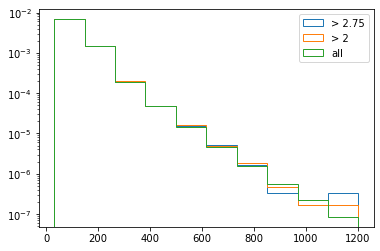

In [23]:
hist, bins, patches = plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() > 2.75], log=True, histtype='step', label='> 2.75', density=True)
plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() > 2], log=True, histtype='step', label='> 2', bins=bins, density=True)
plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() != 0], log=True, label='all', histtype='step', bins=bins, density=True)
plt.legend()
plt.show()

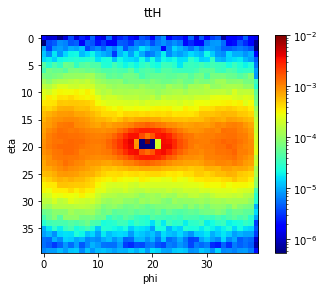

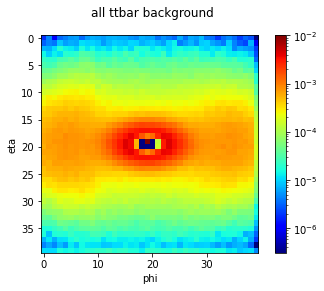

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.cm import get_cmap
import copy

# Copy the jet cmap from matplotlib
my_cmap = copy.copy(get_cmap("jet"))
# Set bad (zero value) pixels to dark blue
my_cmap.set_bad((0, 0, 0.5))

plt.imshow(grid_sg, cmap=my_cmap, norm=LogNorm(vmax=1e-2))
plt.xlabel('phi')
plt.ylabel('eta')
plt.colorbar()
plt.suptitle("ttH")
plt.show()

plt.imshow(grid_bg, cmap=my_cmap, norm=LogNorm(vmax=1e-2))
plt.xlabel('phi')
plt.ylabel('eta')
plt.colorbar()
plt.suptitle("all ttbar background")
plt.show()

In [4]:
import numpy as np

def get_index(val, cat):
    if cat == 'phi':
        val += np.pi
        # val = np.maximum()
        idx = np.minimum(val // 0.16, 39).astype(int)
    if cat == 'eta':
        val += 5
        idx = np.minimum(val // 0.25, 39).astype(int)
    return idx.astype(int)

# jet_image = np.zeros((len(jet_data_arr), 78, 125, 2), dtype=np.half)
# jet_image[:,:,:,:] = np.nan
# for idx, event in enumerate(jet_data_arr):
#     for i in range(14):
#         if i == 0:
#             eta, phi = 63, 39
#         else:
#             eta = get_index(jet_data_arr[:,i,0][jet_data_arr[:, i, 2] != 0] - jet_data_arr[:,0,0][jet_data_arr[:, i, 2] != 0], cat='eta')
#             phi = get_index(jet_data_arr[:,i,0][jet_data_arr[:, i, 1] != 0] - jet_data_arr[:,0,0][jet_data_arr[:, i, 1] != 0], cat='phi')
            
#         jet_image[idx, phi, eta, 0] = event[i,2] # pt
#         jet_image[idx, phi, eta, 1] = event[i,3] # btag discriminator


In [5]:
N = len(jet_data_arr)
jet_images = np.zeros((N, 40, 40, 2), dtype=np.half)
jet_images[:,:,:,0] = np.nan
for jet in range(14):
    if jet == 0:
        etas = 19 * np.ones(N).astype(int)
        phis = 19 * np.ones(N).astype(int)
    else:
        etas = get_index(jet_data_arr[:,jet,0] - jet_data_arr[:,0,0], cat='eta')
        phis = jet_data_arr[:,jet,1] - jet_data_arr[:,0,1]
        phis = np.mod(phis+np.pi, 2*np.pi) - np.pi
        phis = get_index(phis, cat='phi')
    # print("Got coords")       
    pts = jet_data_arr[:, jet, 2]
    # print("got pts")
    btags = jet_data_arr[:, jet, 3]
    # print("got btags")
    # print(etas.dtype)
    jet_images[range(N), etas, phis, 0] = pts
    # print("done pts")
    jet_images[range(N), etas, phis, 1] = btags
    # print("done btags")

In [28]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(jet_images, labels, test_size=0.2, random_state=42)
train_weights, test_weights = train_test_split(data['xs_weight'], test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train[:, :, :, 0] = scaler.fit_transform(X_train[:, :, :, 0].reshape(-1, X_train[:,:,:,0].shape[-1])).reshape(X_train[:,:,:,0].shape)

In [7]:
m = np.nanmax(X_train[:,:,:,0])
X_train[:,:,:,0] /= m
X_test[:,:,:,0] /= m

In [8]:
X_train[:,:,:,0] = np.nan_to_num(X_train[:,:,:,0], 0)
X_test[:,:,:,0] = np.nan_to_num(X_test[:,:,:,0], 0)

In [7]:
# X_test[:, :, :, 0] = scaler.transform(X_test[:,:,:,0].reshape(-1, X_test[:,:,:,0].shape[-1])).reshape(X_test[:,:,:,0].shape)

In [8]:
# X_train[:,:,:,0], X_test[:,:,:,0] = np.nan_to_num(X_train[:,:,:,0], 0), np.nan_to_num(X_test[:,:,:,0], 0)

In [11]:
import matplotlib.pyplot as plt

N = np.sum(y_train)
sg = np.sum(X_train[:,:,:,0][y_train==1], axis=0)/N
plt.imshow(sg, cmap=my_cmap, norm=LogNorm(vmax=5e-3))
plt.colorbar()
plt.show()

bg = np.sum(X_train[:,:,:,0][y_train==0], axis=0)/(len(y_train)-N)
plt.imshow(bg, cmap=my_cmap, norm=LogNorm(vmax=5e-3))
plt.colorbar()
plt.show()


NameError: name 'my_cmap' is not defined

In [9]:
import tensorflow as tf
from tensorflow import keras

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[2], 'GPU') # change 0 to n-1 to use nth gpu
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2022-03-06 11:20:27.977346: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


6 Physical GPUs, 1 Logical GPU


2022-03-06 11:20:31.323568: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 11:20:31.326116: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-06 11:20:32.304203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.56GiB deviceMemoryBandwidth: 298.08GiB/s
2022-03-06 11:20:32.306770: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:5e:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.56GiB deviceMemoryBandwidth: 298.08GiB/s
2022-03-06 11:20:32.309299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:5f:00.0 name: Tesla T4 computeCapability: 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Nadam

inp = Input(shape=list(X_train.shape[1:]))
conv1 = Conv2D(filters=30, kernel_size=(4,4), strides=(1,1), activation='relu', padding="SAME")(inp)
conv2 = Conv2D(filters=30, kernel_size=(4,4), strides=(1,1), activation='relu', padding="SAME")(conv1)
ap = AveragePooling2D(pool_size=(2,2), strides=(2,2))(conv2)
flat = Flatten()(ap)
dense1 = Dense(300, activation="selu", kernel_initializer="lecun_normal")(flat)
dense2 = Dense(300, activation="selu", kernel_initializer="lecun_normal")(dense1)
dense3 = Dense(300, activation="selu", kernel_initializer="lecun_normal")(dense2)
out = Dense(1, activation="sigmoid")(dense3)
model = Model(inputs=inp, outputs=out)
model.compile(loss="binary_crossentropy", optimizer=Nadam(learning_rate=0.001))

In [10]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [11]:
class_weights = {i:j for i,j in enumerate(class_weights)}

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, class_weight=class_weights)

Epoch 1/10
5113/5113 [==============================] - 87s 15ms/step - loss: 0.5867 - val_loss: 0.4837
Epoch 2/10
5113/5113 [==============================] - 59s 11ms/step - loss: 0.5338 - val_loss: 0.6390
Epoch 3/10
5113/5113 [==============================] - 58s 11ms/step - loss: 0.5195 - val_loss: 0.5617
Epoch 4/10
5113/5113 [==============================] - 58s 11ms/step - loss: 0.5138 - val_loss: 0.5073
Epoch 5/10
5113/5113 [==============================] - 59s 11ms/step - loss: 0.5072 - val_loss: 0.4837
Epoch 6/10
5113/5113 [==============================] - 59s 12ms/step - loss: 0.5022 - val_loss: 0.5143
Epoch 7/10
5113/5113 [==============================] - 59s 11ms/step - loss: 0.4945 - val_loss: 0.4965
Epoch 8/10
5113/5113 [==============================] - 59s 11ms/step - loss: 0.4899 - val_loss: 0.5061
Epoch 9/10
5113/5113 [==============================] - 59s 11ms/step - loss: 0.4844 - val_loss: 0.5454
Epoch 10/10
5113/5113 [==============================] - 59s 11m

In [15]:
preds = model.predict(X_test)
preds.reshape(preds.shape[0])

array([0.20117581, 0.7550801 , 0.21694115, ..., 0.21727596, 0.45462373,
       0.08735622], dtype=float32)

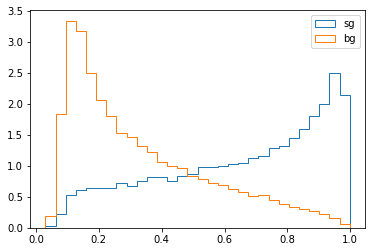

In [19]:
import matplotlib.pyplot as plt

hist, bins, patches = plt.hist(preds[y_test==1], label='sg', histtype='step', bins='auto', density=True)
plt.hist(preds[y_test==0], label='bg', histtype='step', bins=bins, density=True)
plt.legend()
plt.show()

In [20]:
y_pred = preds
thresholds = np.arange(0, 1.0001, 0.0001)
FP = np.zeros(len(thresholds))
FN = np.zeros(len(thresholds))
TP = np.zeros(len(thresholds))
TN = np.zeros(len(thresholds))
lr_FP = np.zeros(len(thresholds))
lr_TP = np.zeros(len(thresholds))

test = y_test
y_pred = y_pred[:,-1].reshape(len(test))

for idx, threshold in enumerate(thresholds):
    # FP[idx] = ((y_test[y_test['ttH125'] == 0]) & (y_pred >= threshold)).sum()
    # FN[idx] = ((y_test[y_test['ttH125'] == 1]) & (y_pred < threshold)).sum()
    # TP[idx] = ((y_test[y_test['ttH125'] == 1]) & (y_pred >= threshold)).sum()
    # TN[idx] = ((y_test[y_test['ttH125'] == 0]) & (y_pred < threshold)).sum()
    # FP[idx] = len(y_test[(y_test['ttH125']==0) & (y_test['Predictions'] >= threshold)])
    # FN[idx] = len(y_test[(y_test['ttH125']==1) & (y_test['Predictions'] < threshold)])
    # TP[idx] = len(y_test[(y_test['ttH125']==1) & (y_test['Predictions'] >= threshold)])
    # TN[idx] = len(y_test[(y_test['ttH125']==0) & (y_test['Predictions'] < threshold)])
    FP[idx] = ((y_pred >= threshold) & (test==0)).sum()
    FN[idx] = ((y_pred < threshold) & (test==1)).sum()
    TP[idx] = ((y_pred >= threshold) & (test==1)).sum()
    TN[idx] = ((y_pred < threshold) & (test==0)).sum()

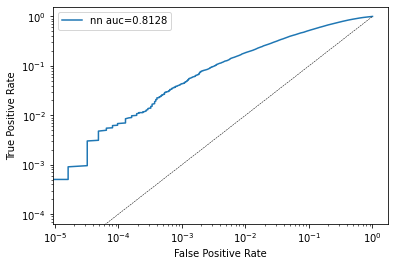

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
# ROC curve
tpr = TP/(np.sum(test))
fpr = FP/(len(test) - np.sum(test))
# tpr_lr = lr_TP/np.sum(test)
# fpr_lr = lr_FP/(len(test)-np.sum(test))
plt.plot(fpr, tpr, label=f'nn auc={auc:.4f}')
plt.plot(np.arange(0, 1.0001, 0.0001), np.arange(0, 1.0001, 0.0001), linestyle='dashed', linewidth=0.5, color='k')
# plt.plot(fpr_lr,tpr_lr, label='lr auc=0.796')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xscale('log')
plt.yscale('log')
plt.legend()
# plt.savefig("./first_lstm_vs_lr_ROC.png", dpi=200)
plt.show()

In [22]:
f1 = TP/(TP+0.5*(FP+FN))
best_f1_idx = np.argmax(f1)
print(thresholds[best_f1_idx])
print(np.max(f1))

0.5471
0.5867663183333707


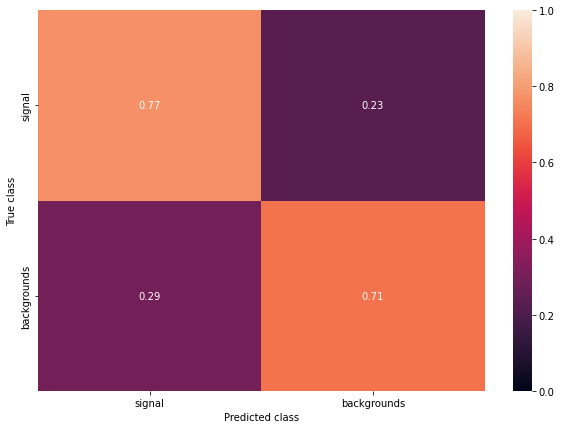

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, [1 if i > 0.5 else 0 for i in y_pred], normalize="true")
plt.figure(figsize=(10,7))
cols = ['signal', 'backgrounds']
sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols, vmin=0, vmax=1)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [29]:
significance_sigma0 = np.zeros(len(thresholds))
significance_sigma5 = np.zeros(len(thresholds))
significance_sigma10 = np.zeros(len(thresholds))
ams = np.zeros(len(thresholds))

lum = 140e3
sg = np.zeros(len(thresholds))
bg = np.zeros(len(thresholds))
sigma = 0.1

for idx, threshold in enumerate(thresholds):
    sg[idx] = (lum * test_weights * 5 * ((y_pred >= threshold) & (test == 1)).astype(int)).sum()
    bg[idx] = (lum * test_weights * 5 * ((y_pred >= threshold) & (test == 0)).astype(int)).sum()
    if bg[idx] > 0:
        significance_sigma0[idx] = sg[idx]/np.sqrt(bg[idx])
        significance_sigma5[idx] = sg[idx]/np.sqrt(bg[idx] + (0.05 * bg[idx])**2)
        significance_sigma10[idx] = sg[idx]/np.sqrt(bg[idx] + (0.1 * bg[idx])**2)
        ams[idx] = np.sqrt(2 * ((sg[idx] + bg[idx] + 10) * np.log(1 + sg[idx]/(bg[idx] + 10)) - sg[idx]))

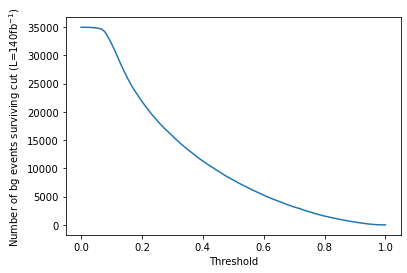

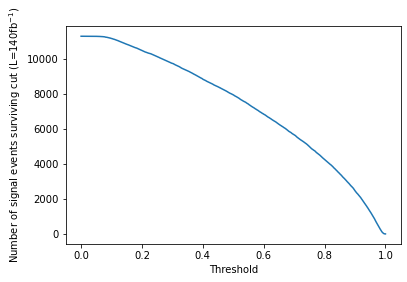

In [26]:
plt.plot(thresholds, bg)
# plt.plot(thresholds, np.sqrt(bg), label="sqrt backgrounds")
plt.xlabel("Threshold")
plt.ylabel(r"Number of bg events surviving cut (L=140fb$^{-1}$)")
# plt.savefig("./first_lstm_bg_surviving.png", dpi=200)
plt.show()

plt.plot(thresholds, sg)
plt.xlabel("Threshold")
plt.ylabel(r"Number of signal events surviving cut (L=140fb$^{-1}$)")
# plt.savefig("./first_lstm_sg_surviving.png", dpi=200)
plt.show()

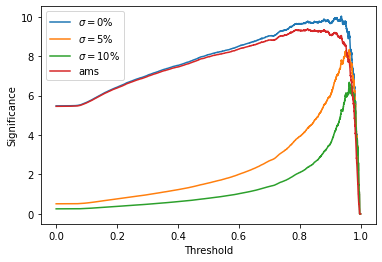

In [30]:
plt.plot(thresholds, significance_sigma0, label=r"$\sigma=0\%$")
plt.plot(thresholds, significance_sigma5, label=r"$\sigma=5\%$")
plt.plot(thresholds, significance_sigma10, label=r"$\sigma=10\%$")
plt.plot(thresholds, ams, label="ams")
# plt.vlines(thresholds[np.argmax(significance)], linestyles="dashed", color='k', ymin=0, ymax=np.max(significance), linewidth=0.8,
#     label=f"Best threshold = {round(thresholds[np.argmax(significance[:end_idx])], 2)}")
# plt.hlines(np.max(significance), linestyles="dashed", color="k", xmin=0, xmax=1.0, linewidth=0.8)
plt.xlabel("Threshold")
plt.ylabel("Significance")
plt.legend()

# plt.savefig("./first_lstm_significance_different_sigmas.png", dpi=200)
plt.legend()
plt.show()

Best threshold for sigma=0% is 0.9367000000000001, significance=10.025499294673745 
Best threshold for sigma=5% is 0.9629000000000001, significance=8.33434120034417 
Best threshold for sigma=10% is 0.9629000000000001, significance=6.6769259540079045


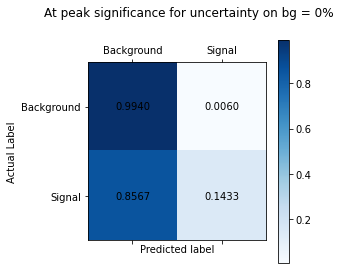

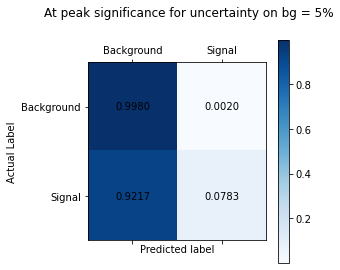

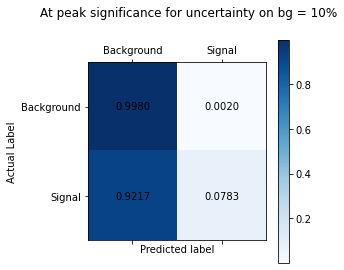

In [35]:
idx_0, idx_5, idx_10 = np.argmax(significance_sigma0), np.argmax(significance_sigma5), np.argmax(significance_sigma10)
print(f"Best threshold for sigma=0% is {thresholds[idx_0]}, significance={significance_sigma0[idx_0]} \nBest threshold for sigma=5% is {thresholds[idx_5]}, significance={significance_sigma5[idx_5]} \nBest threshold for sigma=10% is {thresholds[idx_10]}, significance={significance_sigma10[idx_10]}")
label = {0: 0, 1: 5, 2:10}
# idx_sig5 = np.argmin(abs(significance_sigma10-5))

for j, idx in enumerate((idx_0, idx_5, idx_10)):
    conf_mat = [[1-fpr[idx], fpr[idx]], [1-tpr[idx], tpr[idx]]]
    plt.matshow(conf_mat, cmap='Blues')
    for (x, y), value in np.ndenumerate(conf_mat):
        plt.text(y, x, f"{value:.4f}", va="center", ha="center")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual Label')
    plt.xticks([0,1], labels=['Background', 'Signal'])
    plt.yticks([0,1], labels=['Background', 'Signal'])
    plt.colorbar()
    plt.suptitle(f"At peak significance for uncertainty on bg = {label[j]}%")
    # plt.savefig(f"./first_lstm_conf_mat_sigma_{label[j]}.png", dpi=200)
    plt.show()

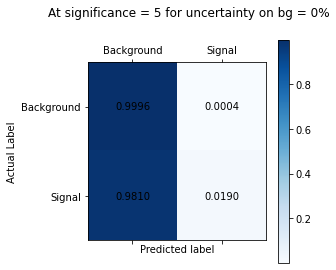

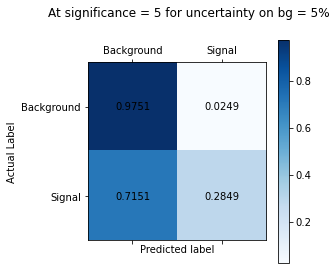

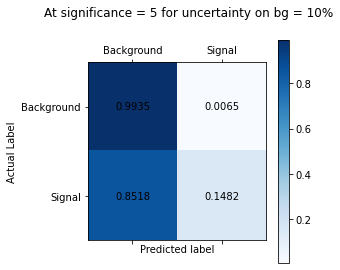

In [36]:
idx_0, idx_5, idx_10 = np.argmin(abs(5-significance_sigma0)), np.argmin(abs(5-significance_sigma5[:idx_5])), np.argmin(abs(5-significance_sigma10[:idx_10]))
# print(f"Best threshold for sigma=0% is {thresholds[idx_0]} \nBest threshold for sigma=5% is {thresholds[idx_5]} \nBest threshold for sigma=10% is {thresholds[idx_10]}")
label = {0: 0, 1: 5, 2:10}
# idx_sig5 = np.argmin(abs(significance_sigma10-5))

for j, idx in enumerate((idx_0, idx_5, idx_10)):
    conf_mat = [[1-fpr[idx], fpr[idx]], [1-tpr[idx], tpr[idx]]]
    plt.matshow(conf_mat, cmap='Blues')
    for (x, y), value in np.ndenumerate(conf_mat):
        plt.text(y, x, f"{value:.4f}", va="center", ha="center")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual Label')
    plt.xticks([0,1], labels=['Background', 'Signal'])
    plt.yticks([0,1], labels=['Background', 'Signal'])
    plt.colorbar()
    plt.suptitle(f"At significance = 5 for uncertainty on bg = {label[j]}%")
    # plt.savefig(f"./first_lstm_conf_mat_sigma_{label[j]}_sig_5.png", dpi=200)
    plt.show()

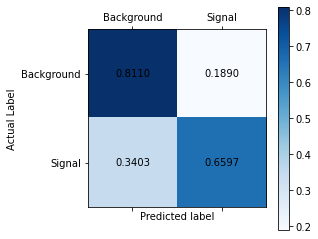

In [37]:
conf_mat = [[1-fpr[best_f1_idx], fpr[best_f1_idx]], [1-tpr[best_f1_idx], tpr[best_f1_idx]]]
plt.matshow(conf_mat, cmap='Blues')
for (x, y), value in np.ndenumerate(conf_mat):
    plt.text(y, x, f"{value:.4f}", va="center", ha="center")
plt.xlabel('Predicted label')
plt.ylabel('Actual Label')
plt.xticks([0,1], labels=['Background', 'Signal'])
plt.yticks([0,1], labels=['Background', 'Signal'])
plt.colorbar()
# plt.suptitle(f"At significance = {thresholds[best_f1_idx]}")
# plt.savefig(f"./first_lstm_conf_mat_sigma_{label[j]}_sig_5.png", dpi=200)
plt.show()

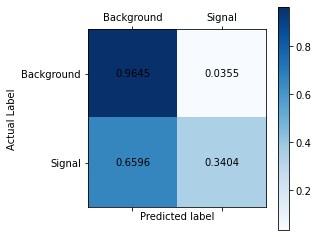

In [38]:
best_ams_idx = np.argmax(ams)

conf_mat = [[1-fpr[best_ams_idx], fpr[best_ams_idx]], [1-tpr[best_ams_idx], tpr[best_ams_idx]]]
plt.matshow(conf_mat, cmap='Blues')
for (x, y), value in np.ndenumerate(conf_mat):
    plt.text(y, x, f"{value:.4f}", va="center", ha="center")
plt.xlabel('Predicted label')
plt.ylabel('Actual Label')
plt.xticks([0,1], labels=['Background', 'Signal'])
plt.yticks([0,1], labels=['Background', 'Signal'])
plt.colorbar()
# plt.suptitle(f"At significance = {thresholds[best_f1_idx]}")
# plt.savefig(f"./first_lstm_conf_mat_sigma_{label[j]}_sig_5.png", dpi=200)
plt.show()